<a href="https://colab.research.google.com/github/Rojanmhj2055/complete-javascript-course/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch torchvision

In [ ]:
import torch 
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
transform =transforms.Compose([transforms.Resize((28,28)),
                          transforms.ToTensor(),
                              transforms.Normalize((0.5,),(0.5,)) ])
training_dataset = datasets.MNIST(root="./data",train=True,download=True,transform=transform)
training_dataset
validation_dataset = datasets.MNIST(root="./data",train=False,download=True,transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100,shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset,batch_size=100,shuffle=False)


In [ ]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image


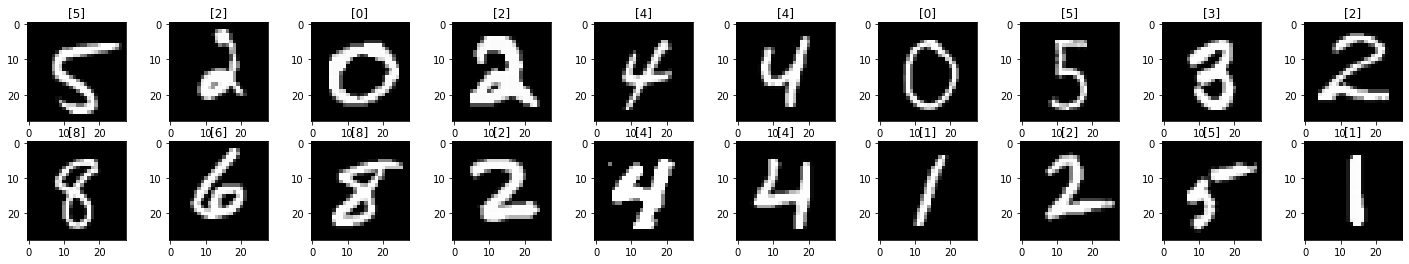

In [ ]:
dataiter = iter(training_loader) 
images , labels = dataiter.next() 
fig = plt.figure(figsize=(25,4))

for i in np.arange(20): 
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i])) 
  ax.set_title([labels[i].item()])

In [ ]:
class Classifier(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super().__init__()
    self.Linear1 = nn.Linear(D_in,H1)
    self.Linear2 = nn.Linear(H1,H2)
    self.Linear3 = nn.Linear(H2,D_out)

  def forward(self,x):
    x = F.relu(self.Linear1(x))
    x = F.relu(self.Linear2(x))
    x = self.Linear3(x)
    return x

In [ ]:
model = Classifier(784,125,65,10)
model

Classifier(
  (Linear1): Linear(in_features=784, out_features=125, bias=True)
  (Linear2): Linear(in_features=125, out_features=65, bias=True)
  (Linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criteration = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
epochs = 12
running_loss_history =[]
running_corrects_history=[]
va_running_loss_history =[]
val_running_loss_corrects=[]

for e in range(epochs):
  running_loss=0.0
  running_corrects =0.0
  val_running_loss =0.0
  val_running_corrects = 0.0
  for inputs ,labels in training_loader:
    inputs = inputs.view(inputs.shape[0],-1)
    outputs = model(inputs)  #has the buch of scores
    #1 ,28 ,28inputs
    loss = criteration(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs,1)  #yeid the maximum scores rreturns maxscore
                                    #and the index of the maximum value
    running_corrects+=torch.sum(preds == labels.data)
    running_loss+=loss.item()
  else:
    with torch.no_grad():
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.view(inputs.shape[0],-1)
        val_outputs = model(val_inputs)  #has the buch of 
        val_loss = criteration(val_outputs,val_labels)
        _,val_preds = torch.max(val_outputs,1)
        val_running_loss+=val_loss.item()
        val_running_corrects+=torch.sum(val_preds == val_labels)


    epoch_loss = running_loss/len(training_loader)
    epoch_acc  =running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects/len(validation_loader)
    va_running_loss_history.append(val_epoch_loss)
    val_running_loss_corrects.append(val_epoch_acc)
    print('epoch:',e+1)
    print('training Loss:{:.4f},Acc {:.4f}'.format(epoch_loss,epoch_acc.item()))
    print('Validation loss:{:.4f}, validation acc {:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

epoch: 1
training Loss:0.1332,Acc 96.1100
Validation loss:0.1386, validation acc 95.8400
epoch: 2
training Loss:0.1252,Acc 96.3717
Validation loss:0.1315, validation acc 96.0600
epoch: 3
training Loss:0.1188,Acc 96.5783
Validation loss:0.1297, validation acc 96.0100
epoch: 4
training Loss:0.1128,Acc 96.7067
Validation loss:0.1260, validation acc 96.2500
epoch: 5
training Loss:0.1072,Acc 96.8167
Validation loss:0.1247, validation acc 96.2800
epoch: 6
training Loss:0.1027,Acc 96.9567
Validation loss:0.1154, validation acc 96.5400
epoch: 7
training Loss:0.0971,Acc 97.1583
Validation loss:0.1099, validation acc 96.6000
epoch: 8
training Loss:0.0927,Acc 97.3100
Validation loss:0.1088, validation acc 96.7000
epoch: 9
training Loss:0.0883,Acc 97.4283
Validation loss:0.1051, validation acc 96.7700
epoch: 10
training Loss:0.0845,Acc 97.5550
Validation loss:0.1050, validation acc 96.7900
epoch: 11
training Loss:0.0810,Acc 97.6550
Validation loss:0.0988, validation acc 96.9700
epoch: 12
training 

In [ ]:
print(running_corrects_history)

[tensor(57666.), tensor(57823.), tensor(57947.), tensor(58024.), tensor(58090.), tensor(58174.), tensor(58295.), tensor(58386.), tensor(58457.), tensor(58533.), tensor(58593.), tensor(58643.)]


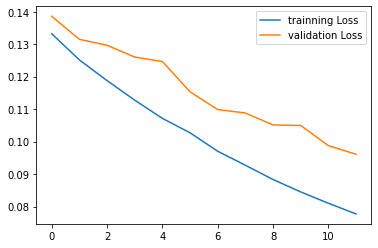

In [ ]:
plt.plot(running_loss_history,label='trainning Loss')

plt.plot(va_running_loss_history,label="validation Loss")
plt.legend()


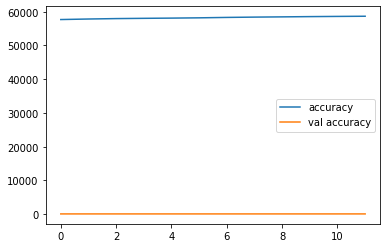

In [ ]:
plt.plot(running_corrects_history, label="accuracy") #mistake
plt.plot(val_running_loss_corrects,label="val accuracy")
plt.legend()

In [ ]:
import requests
import PIL.ImageOps
from PIL import Image
url = "https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url,stream = True)
img = Image.open(response.raw)



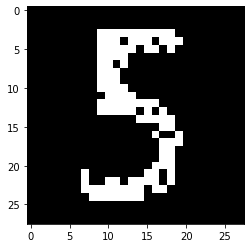

In [ ]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))


In [ ]:
img = img.view(img.shape[0],-1)
outputs = model(img)  #has the buch of 
        
_,preds = torch.max(outputs,1)
print(preds.item())

5


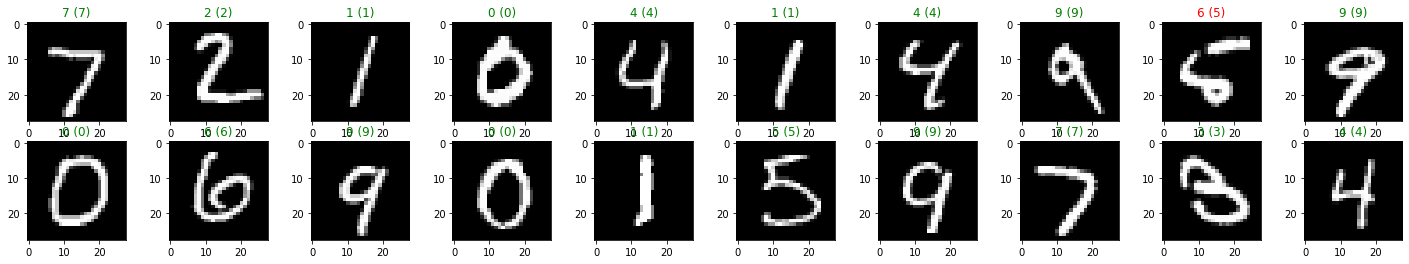

In [ ]:
dataiter = iter(validation_loader) 
images , labels = dataiter.next() 
images_ = images.view(images.shape[0],-1)
output = model(images_)
_,preds = torch.max(output,1)
fig = plt.figure(figsize=(25,4))

for i in np.arange(20): 
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i])) 
  ax.set_title("{} ({})".format(str(preds[i].item()),str(labels[i].item())),color=("green" if preds[i]==labels[i] else "red"))